# TP : Reconstruction of DOSY NMR signals fait par Maria Cherifa 

# Partie 1

# Generation of synthetic data

**Question 1:**

Téléchargement du signal de diffusion $\bar{x}$

In [295]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings("ignore")
N=200
x = open("tp.txt")
x = x.read()
x = x.split("\n")
sin = np.zeros(N)
for i in range(N):
    sin[i] = float(x[i])

**Question 2:**

Creation de T en utilisant le sampling exponentiel :
\begin{align}
\forall n \in \{1, \ldots, N\}, \quad T^{(n)} = T_{\min} \exp \big(- (n - 1) \frac{\log(T_\min / T_\max)}{N - 1} \big)
\end{align}
avec  $T_\min = 1$ and $T_\max = 1000$.

In [296]:
T=[]
t_min=1
t_max=1000
for n in range(N):
    T.append(t_min*np.exp(-(n)*np.log(t_min/t_max)/N))

**Question 3:**

Plot du signal original $\bar{x}$ comme une fonction de T. 

Text(0.5, 1.0, 'Le signal original x  comme une fonction de  T')

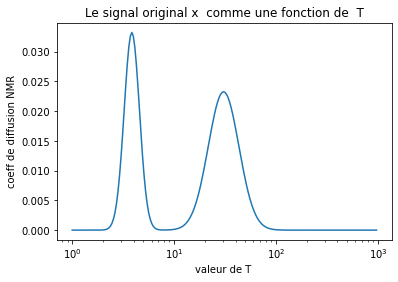

In [297]:
plt.semilogx(T,sin)
plt.xlabel("valeur de T ")
plt.ylabel("coeff de diffusion NMR")
plt.title('Le signal original x  comme une fonction de  T')

**Question 4**:

Creation du vecteur t :
$$\forall m \in \{1, \ldots, M \}), \quad t^{(m)} = t_\min + \frac{m - 1}{M - 1} (t_\max - t_\min)$$

avec $M=50$,$t_{min}=0$ et $t_{max} =1.5$

In [298]:
M=50
T_min=0
T_max=1.5
t=[]
for m in range(M):
    t.append(T_min+(T_max-T_min)*m/M)


**Question 5**

création de la matrice K en utilisant la formule : 
$$\forall m \in \{1,..,M\}, n \in \{1,..,N\},  \hspace{0.2cm} K^{(m,n)}=exp(-T^{(n)}\,t^{(m)})$$

In [299]:
K=np.zeros((M,N))
for i in range(M):
    for j in range(N):
        K[i,j]=np.exp(-np.dot(T[j],t[i]))

**Question 6 **

Simulation  des données bruitées  suivant le model : 
$$y=K\,x+w, \hspace{0.1cm}\mbox{avec }\hspace{0.1cm} w \sim \mathcal{N}(0,\sigma^2\,I_M), \hspace{0.1cm}\mbox{et}\hspace{0.1cm} \sigma = 0.01\,z^{(1)}  \hspace{0.1cm}\mbox{et}\hspace{0.1cm}  z=K\,\bar{x}$$

In [300]:
z=np.dot(K,sin)
om=0.01*z[0]
np.random.seed(42)
w=np.random.normal(0,om, 50)
y=z+w

**Question 7 **

Plot du résultat de simulation. 

Text(0.5, 1.0, 'Signaux réels et bruités en fonction de t')

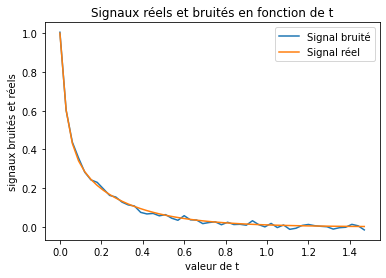

In [301]:
plt.plot(t,y,label='Signal bruité')
plt.plot(t,z, label='Signal réel')  
plt.xlabel("valeur de t")
plt.ylabel("signaux bruités et réels")
plt.legend()
plt.title('Signaux réels et bruités en fonction de t')

# Comparison des strategies de  regularization :

Pour chaque fonction de penalisation $g$ donnée nous allons faire ce qui suit :
1. Discussion de l'existence et l'unicité d'une solution au problème : 
$$ \text{arg}\min_{x \in \mathbb{R}^N} \frac{1}{2} \parallel Kx - y \parallel^2 + \beta g(x)$$
2. Proposistion d'une approche pour résoudre le problème précédent .
3. Implementation de l'approche et tracer la solution obtenue. 
4. Calcul de l'erreur quadratique entre  $\hat{x}$ et $\overline{x}$:
$$ E(\hat{x}, \overline{x}) = \frac{\parallel \hat{x} - \overline{x} \parallel^2}{\parallel \overline{x} \parallel^2}$$
5.  Recherche manuelle du meilleur choix pour le paramètre $\beta$ en terme de l'erreur quadratique.

# 1-**Smoothness prior**:

$$x􏰅=\underset{x \in \mathbf{R}^n}{\mbox{argmin}}f(x)=\underset{x \in \mathbf{R}^n}{\mbox{argmin}} \frac{1}{2}||K\,x−y||^2+\frac{\beta}{2}||Dx||^2$$
$1$-  Le fonction $f$ est propre, continue et coercive donc le minimum de $f$ existe, de plus $f$ est la somme de deux fonctions convexes (norme au carré est convexe ) donc cette fonction  est convexe elle admet donc  un unique minimum. 

$2$- Pour résoudre ce problème, il suffit juste d'annuler le gradient de la fonction $f$ :
$$\nabla f(x) = K^{T}Kx - K^{T}y + \beta D^{T}Dx =0 \iff (K^T K + \beta D^T D) \hat{x} = K^T y \iff \boxed{\hat{x} = (K^T K + \beta D^T D)^{-1} K^T y}$$
Ceci est vrai si et seulement si $K^T K + \beta D^T D$ est inversible.


3-Implementation  de l'approche : 

In [302]:
c = np.zeros(N)
c[0] = 1
c[1] = -1
D=scipy.linalg.circulant(c)
def sol_1(beta):
    res= np.linalg.solve(K.T.dot(K) + beta * D.T.dot(D), K.T.dot(y))
    return res

$4$- Implementation de l'erreur quadratique:

In [303]:
def quadratic_error(x,x_chap):
    return np.linalg.norm(x_chap-x)**2/np.linalg.norm(x)**2

5- Recherche manuelle du meilleur $\beta$ en terme d'erreur quadratique :

In [304]:
best_err = np.inf
best_x_hat = None
best_beta = None

beta_range = np.linspace(1e-2, 1, num=50, endpoint=True)

for beta in beta_range:
    x_hat = sol_1(beta)
    err = quadratic_error(sin,x_hat)
    
    # meilleur beta 
    if err < best_err:
        best_err = err
        best_x_hat = x_hat
        best_beta = beta
print("la meilleur valeur de l'erreur quadratique est ",best_err,"la valeur de  β correspondante est ", best_beta)

la meilleur valeur de l'erreur quadratique est  0.3901080032974987 la valeur de  β correspondante est  0.5555102040816327


Visualisation de la solution trouvé par sol_1 et comparaison avec le signal original 

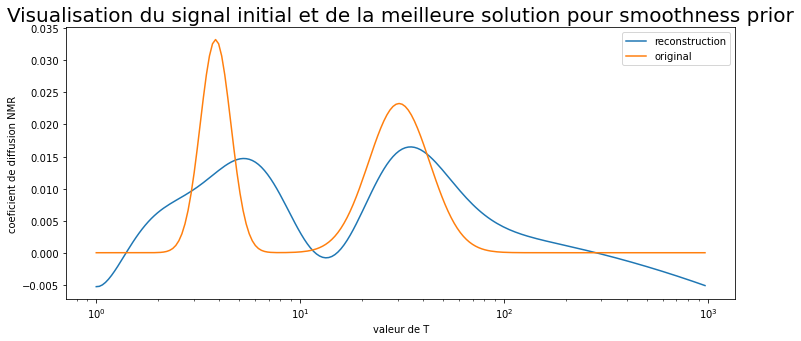

In [305]:
plt.figure(figsize=(12, 5))
plt.title("Visualisation du signal initial et de la meilleure solution pour smoothness prior",fontsize= 20)
plt.semilogx(T, best_x_hat, label="reconstruction")
plt.semilogx(T, sin, label="original")
plt.xlabel("valeur de T")
plt.ylabel("coeficient de diffusion NMR")
plt.legend(frameon=True);

# Observation : 


Nous avons  deux pics pour le signal reconstruit bien qu'ils ne se produisent pas pour le même échantillon et ne coincident pas avec les pics du signal initial. De plus, les pics récupérés ne sont pas aussi nets que ceux du signal initial. De plus, nous avons  quelques valeurs négatives pour le coefficient de diffusion NMR qui n'ont pas de sens d'un point de vue physique.

# 2-**Smoothness prior + constraints :**

$$x􏰅=\underset{x \in \mathbf{R}^n}{\mbox{argmin}}f(x) = \underset{x \in \mathbf{R}^n}{\mbox{argmin}} \frac{1}{2}\| Kx-y\|^{2} + \frac{\beta}{2}\| Dx\|^{2} + \iota_{[x1,x2]}(x)$$
$1$- On peut réecrire le problème comme un problèlme d'optimisation sous contraintes :
$$x􏰅=\underset{x \in C}{\mbox{argmin}}f(x) = \underset{x \in C}{\mbox{argmin}}\frac{1}{2}\| Kx-y\|^{2} + \frac{\beta}{2}\| Dx\|^{2} $$
C est un ensemble fermé borné de dimension fini, donc C est compact, par la continuité du problème précédent, nous savons alors que l'ensemble des minimiseurs n'est pas vide. 
De plus  C est un ensemble non vide convexe, comme la fonction $f$ est aussi convexe (somme de normes au carré),donc **le problème a au plus une unique solution**.

$2$- Pour la stratégie algorithmique à suivre pour trouver la solution du problème précédent : 
Nous avons que $f$ est propre et convexe et continue.

Le gradient de $f$  est v-Lipschitzien avec  v  la plus grande valeur propre de  $K^T\,K+\beta\,D^T\,D$ :
$$\forall x,y \in C ||\nabla\,f(x)-\nabla\,f(y)||=||K^T\,K+\beta\,D^T\,D(x-y)||\leq v(x-y)$$

Aussi C est un ensemble fermé avec l'ensemble des minimiseurs de $f$ qui est inclus dans C. 
Donc le meilleur algorithme est **Le gradient projeté**.

3-Implementation : 

In [306]:
#gradient de la fonction 
def grad1(x,beta):
    res = np.dot(np.dot(np.transpose(K),K),x) - np.dot(np.transpose(K),y) + beta*np.dot(np.dot(np.transpose(D),D),x)
    return res


def projected_grad(beta,x0,epsilon):
    vpmax1 = np.max(np.linalg.eigvals(np.dot(np.transpose(K),K) + beta*np.dot(np.transpose(D),D)))
    gamma1 = 1/vpmax1
    delta1 = 2-gamma1*vpmax1/2
    lambda1 = delta1/2
    itmax = 50000
    it = 0
    xn = x0
    err = 1
    while it<=itmax and err>epsilon:
        f = xn - gamma1*grad1(xn,beta)
        xnew = xn + lambda1*(np.clip(f,min(sin),max(sin))-xn)
        it = it + 1
        err = np.linalg.norm(xnew - xn,1)/np.linalg.norm(xn,1)
        xn = xnew
    return xn

5- Recherche manuelle du meilleur  β  en terme d'erreur quadratique :

In [307]:
best_err = np.inf
best_x_hat = None
best_beta = None
x0 = np.zeros(len(sin))
epsilon = 10**-4
beta_range2 =np.linspace(0.1, 1, num=10, endpoint=True)

for beta in beta_range2:
    x_hat = projected_grad(beta,x0,epsilon)
    err = quadratic_error(sin,x_hat)
    if err < best_err:
        best_err = err
        best_x_hat = x_hat
        best_beta = beta
print("la meilleur valeur de l'erreur quadratique est ",best_err,"son β correspondant est ", best_beta)

la meilleur valeur de l'erreur quadratique est  0.29451913858194834 son β correspondant est  0.30000000000000004


Visualisation de la solution trouvé par gradient projeté et comparaison avec le signal original : 

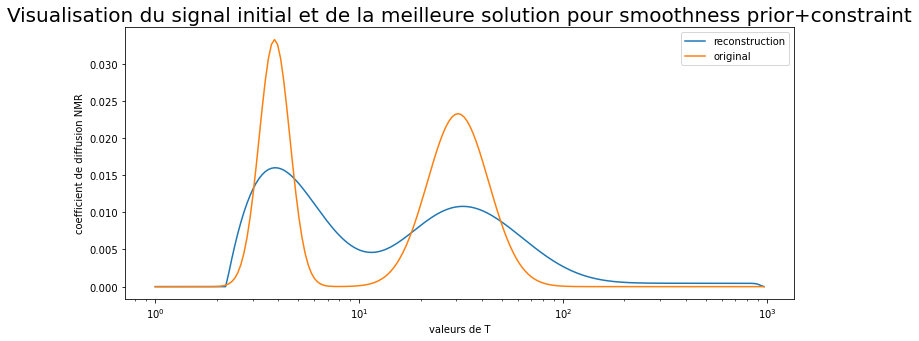

In [308]:
plt.figure(figsize=(12, 5))
plt.title("Visualisation du signal initial et de la meilleure solution pour smoothness prior+constraint",fontsize= 20)
plt.semilogx(T, best_x_hat, label="reconstruction")
plt.semilogx(T, sin, label="original")
plt.xlabel("valeurs de T")
plt.ylabel("coefficient de diffusion NMR")
plt.legend(frameon=True);

# Observations:
Nous avons les deux pics pour le signal reconstruit et voyons clairement l'effet de la projection sur la valeur minimale du signal reconstruit. L'ajout des contraintes au bord produit une meilleure erreur de reconstruction par rapport à l'utilisation uniquement du smoothness prior. Cependant, les centres des pics dans le signal reconstruit sont légèrement décalés de leurs positions comparé à ceux du signal initial.

# 2-**Sparsity prior:**
$$x􏰅=\underset{x \in \mathbf{R}^n}{\mbox{argmin}}f(x) = \underset{x \in \mathbf{R}^n}{\mbox{argmin}} \frac{1}{2}\| Kx-y\|^{2} + \beta\,||x||_1$$
$1$- Notons $f(x)\geq ||x||_1\geq C ||x||$, Ou C est une constante qui vient de l'équilvalence des normes en dimension fini, donc $f$ est coercive ce qui prouve que $f$ admet **au moin un minimiseur**.

$2$- Pour résoudre le problème précédent l'idée est de considèrer $f=f_1+f_2$ avec $f_1: x\in \mathbf{R}^N \longrightarrow \frac{1}{2}\| Kx-y\|^{2}  $ et $f_2(x)=\beta\,||x||_1$, comme $f_1$ et $f_2$ sont propres, continues  et convexes implique que $f\in \Gamma_0 $. De plus le gradient $f_1$ est v Lipchtisien avec v la plus grande valeur propre de $K^T\,K$. Alors $f$ admet au moins un minimieur, afin de trouver une solution approché de ce problème utilisons l'algorithme **Forward-Backward**.

3-Implementation 

In [309]:
#gradient de la fonction 
def grad_f2(x):
    return np.dot(np.dot(np.transpose(K),K),x) - np.dot(np.transpose(K),y)
#operateur proximal 
def prox(a,beta,gamma):
    return np.sign(a)*np.clip(np.abs(a)-gamma*beta,0,np.inf)

def BF(beta,x0,eps):
    vp_max = np.max(np.linalg.eigvals(np.dot(np.transpose(K),K)))
    gamma = 1.98/vp_max
    delta = 2-gamma*vp_max/2
    lambda_ = delta/2
    itr_max = 5000
    err = 1
    i = 0
    xn = x0
    while i<=itr_max and err>epsilon:
        y = xn - gamma*grad_f2(xn)
        xnew = xn + lambda_*(prox(y,beta,gamma)-xn)
        i = i + 1
        err = np.linalg.norm(xnew - xn,1)/np.linalg.norm(xn,1)
        xn = xnew
    return xn

5- Recherche manuelle du meilleur β en terme d'erreur quadratique :

In [310]:
#erreur quadratiques pour different beta.
best_err = np.inf
best_x_hat = None
best_beta = None
x0 = np.zeros(len(sin))
epsilon = 10**-5
beta_range3 =np.linspace(0.1, 0.5, num=10, endpoint=True)

for beta in beta_range3:
    x_hat = BF(beta,x0,epsilon)
    err = quadratic_error(sin,x_hat)
    if err < best_err:
        best_err = err
        best_x_hat = x_hat
        best_beta = beta
print("la meilleur valeur de l'erreur quadratique est ",best_err,"son β correspondant est ", best_beta)

la meilleur valeur de l'erreur quadratique est  0.1883633493997462 son β correspondant est  0.1


Visualisation de la solution trouvé par  Forward-Backward et comparaison avec le signal original :

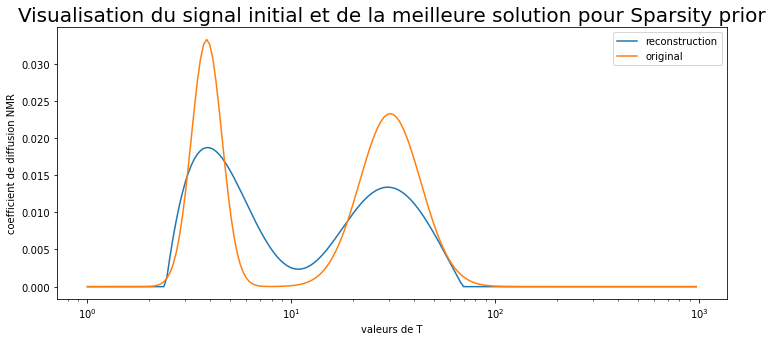

In [268]:
#visualisation de la solution x pour diffrent beta :
plt.figure(figsize=(12, 5))
plt.title("Visualisation du signal initial et de la meilleure solution pour Sparsity prior",fontsize= 20)
plt.semilogx(T, best_x_hat, label="reconstruction")
plt.semilogx(T, sin, label="original")
plt.xlabel("valeurs de T")
plt.ylabel("coefficient de diffusion NMR")
plt.legend(frameon=True);

# Observations :

Nous avons clairement que les deux pics dans le signal reconstruit sont presque identiques à ceux du signal initial. Nous obtenons une meilleure erreur de reconstruction comparée à celles des deux algorithmes précédents. Le signal reconstruit approche mieux le signal initial. 


# Conclusion :
 Cependant ces résultats basés sur des données synthétiques ** dépendent fortement du bruit ** ajouté à la mesure du signal initial.  Nous avons rencontré des exemples du problème  Smoothness+ constraint (cas 2) qui ont produit une erreur inférieure à la La sparse prior mais cela depend d'une bruit donc nous ne pouvons pas tirer une conclusions sur la performance de ces algorithmes, ils dépendent généralement des données utilisés et du problème. 

# Partie 2 : Maximum entropy regularization

Soit la problème d'optimisation suivant :
$$x􏰅=\underset{x \in \mathbf{R}^n}{\mbox{argmin}}f(x) = \underset{x \in \mathbf{R}^n}{\mbox{argmin}} \frac{1}{2}\| Kx-y\|^{2} + \beta\,ent(x)$$
avec $$ \forall x\in \mathbf{R}^n, ent(x)=\sum_{n=1}^N\phi(x^{(n)})$$
et $$(\forall u \in \mathbf{R})\hspace{0.3cm} \phi(u)=\begin{cases}
u\,log(u) & u>0\\
0 &u=0\\
+\infty & sinon 
\end{cases}$$


**Question 1**

$-$ On cherche à savoir si $ent(x)$ est convexe, propre, l.s.c, differentiable. En effet la fonction $\phi$ est convexe car pour $u>0$ on a $\phi''(u)=\frac{1}{u}>0$ (propriété du second ordre de convexité) donc $\phi$ est convexe sur $\mathbf{R}_{*}^{+}$ son prologement en $\mathbf{R}^{-}$ l'est aussi  , donc $ent(x)$ est la somme de fonction convexe alors elle est  même convexe.  Comme $\phi(x)$ est propre car son domaine n'est pas vide on déduit que $ent(x)$ est propre.<br/>
La fonction $\phi$ est continue sur $\mathbf{R}_{*}^{+}$ et adment une limite finie en $0^+$ égale à zero, donc $\phi$ est prolongeable par continuité en 0, on déduit que  l'épigraphe de $\phi$ est fermé, ce qui implique que  $\phi$ est semi-continue inférieure. Comme $ent(x)$ est la somme de fonction semi-continue inférieure elle est alors semi-continue inférieure.<br/>
$\phi^{'}$ n'est pas prolongeable par continuité en $0$ car sa limite en  $0^{+}$ qui vaut $\infty$. Ainsi $\phi$ n'est pas différentiable sur son domaine de définition. On en déduit que $ent$ n'est pas différentiable.

**Question 2**

$-$Comme prouvé précédemment la fonction $ent$ est convexe propre et semi-continue inféfrieur, de plus $||Kx-y||^2$ est aussi une fonction convexe propre ceci implique que la fonction $f(x)=\frac{1}{2}\| Kx-y\|^{2} + \beta\,ent(x)$ admet un unique minimum.

**Question 3**

$-$ On cherche l'operateur de proximité de $ent(x)$, en effet la fonction $ent$ est une somme de fonctions , pour calculer son opérateur proximale il suffit de calculer le proximale de $\beta \phi$. Pour cela calculons $\underset{u}{min}\hspace{0.1cm}a(u)=\underset{u}{min} \frac{1}{2}\|u-x\|^{2} +\beta \phi(u)$.  Et donc la dérivée de la fonction $a$ est donnée par :
$$a'(u)=(u-x)+\beta (log(u)+1)$$
la dérivée s'annule pour $\beta log(u) + u = x - \beta$.  De plus on sait que la fonction $a$ admet un unique minimum ce dernier est atteint en $u=\beta W(e^{\frac{x}{\beta}-1-log(\beta)})$ où $W$ est la la W-fonction de Lambert. On en déduit que 
$$prox_{\beta ent}(x) = (\beta W(e^{\frac{x^{(i)}}{\beta}-1-log(\beta)}))_{1 \leq i \leq N} \hspace{0.2cm} \mbox{où}\hspace{0.2cm} x = (x^{(1)},...,x^{(N)})$$

**Question 4**

$-$L'algorithme Douglas-Rachford et le forward-backward algorithme :

In [311]:
from scipy.special import lambertw
#la fonction prox_ent
def prox_ent(x, beta, gamma):
    return gamma*beta*lambertw(np.exp((x/(beta*gamma)-1-np.log(beta*gamma))))
#l'operateur proximal de f 
def prox_f(x,gamma):
    return np.linalg.inv(gamma*K.T.dot(K)+np.eye(len(K.T))).dot(gamma*K.T.dot(y)+x)
#Algo de Douglas-Rachford 
def DR(beta,gamma,x0,eps):
    itmax = 10000
    err = 1
    it = 0
    xn = x0
    while it<=itmax and err>epsilon:
        yn=prox_ent(xn,beta, gamma)
        zn=prox_f(2*yn-xn,gamma)
        xnew=xn+ 1.98*(zn-yn)
        err=np.linalg.norm(xnew - xn,1)/np.linalg.norm(xn,1)
        xn=xnew
    return xn

**Question 5**

$-$Test de l'algorithme avec $\beta=0.01$ :

In [312]:
test = DR(0.01,0.01,x0,epsilon)
err1 = quadratic_error(sin, test)
print("l'erreur quadrtique entre le vrai signal et la solution trouvé par l'algorithme Douglas-Rachford ",err1)


l'erreur quadrtique entre le vrai signal et la solution trouvé par l'algorithme Douglas-Rachford  0.5679123257053742


Visualisation de la solution trouvé par l'algorithme Douglas-Rachford et le signal initial :


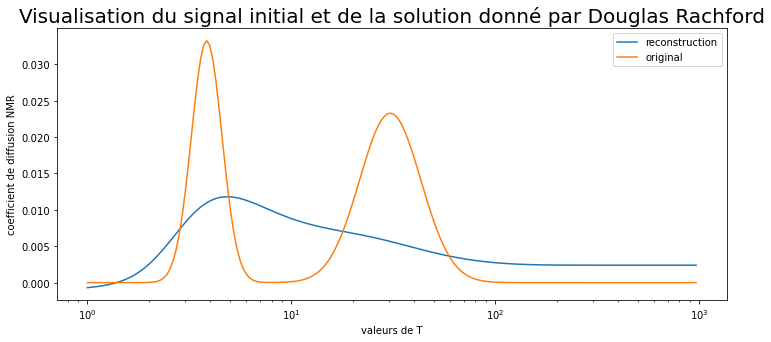

In [313]:
plt.figure(figsize=(12, 5))
plt.title("Visualisation du signal initial et de la solution donné par Douglas Rachford",fontsize= 20)
plt.semilogx(T, test, label="reconstruction")
plt.semilogx(T, sin, label="original")
plt.xlabel("valeurs de T")
plt.ylabel("coefficient de diffusion NMR")
plt.legend(frameon=True);

- Forward-backward algorithme pour le problem "entropy maximisation"

In [314]:
##Algorithme de forward-backward 

def grad2(x):
    res = np.dot(np.dot(np.transpose(K),K),x) - np.dot(np.transpose(K),y) 
    return res

x0 = np.zeros(len(sin))
epsilon = 10**-6

def FB(beta,x0,epsilon):
    vpmax2 = np.max(np.linalg.eigvals(np.dot(np.transpose(K),K)))
    gamma2 = 1.98/vpmax2
    delta2 = 2-gamma2*vpmax2/2
    lambda2 = delta2/2
    itmax = 10000
    err = 1
    it = 0
    xn = x0
    while it<=itmax and err>epsilon:
        yn = xn - gamma2*grad2(xn)
        xnew = xn + lambda2*(prox_ent(yn,beta, gamma2)-xn)
        it = it + 1
        err = np.linalg.norm(xnew - xn,1)/np.linalg.norm(xn,1)
        xn = xnew
    return xn


**Question 5**

$-$On calcule l'erreur quadratique pour $\beta=0.01$ :

In [315]:
test2 = FB(0.01,x0,epsilon)
err2 = quadratic_error(sin, test2)

print("l'erreur quadrtique entre le vrai signal et la solution trouvé par l'algorithme Forward-Backward ",err2)

l'erreur quadrtique entre le vrai signal et la solution trouvé par l'algorithme Forward-Backward  0.5697361132930189


Visualisation:

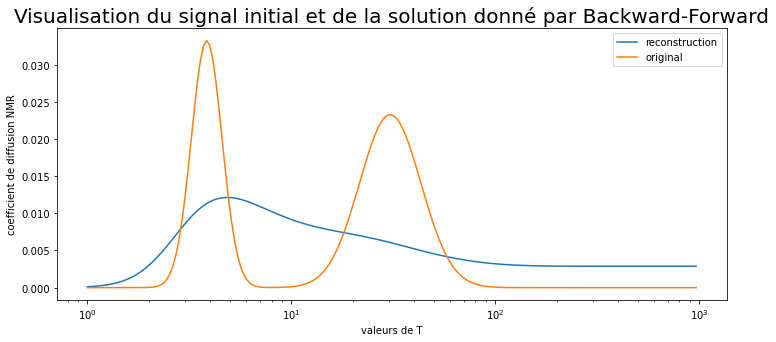

In [316]:
plt.figure(figsize=(12, 5))
plt.title("Visualisation du signal initial et de la solution donné par Backward-Forward",fontsize= 20)
plt.semilogx(T, test2, label="reconstruction")
plt.semilogx(T, sin, label="original")
plt.xlabel("valeurs de T")
plt.ylabel("coefficient de diffusion NMR")
plt.legend(frameon=True);

# Observations:

* En comparant l'erreur quadratique des deux algorithmes :  Douglas-Rachford  et  Forward-Backward pour  $\beta =0.01$  la difference est très minime donc la performance des deux algorithmes est presque similaire.


**Question 6**

$-$ Le meilleur choix donc pour $\beta$ pour l'algorithme Douglas Rachford est donné par :

In [317]:
best_err = np.inf
best_x_hat = None
best_beta = None
best_counter=None
x0 = np.zeros(len(sin))
epsilon = 10**-4
beta_range5 =np.linspace(1e-5, 1e-3, num=3, endpoint=True)
for beta in beta_range5:
    x_hat = DR(beta,0.1,x0,epsilon)
    err = quadratic_error(sin,x_hat)
    if err < best_err:
        best_err = err
        best_x_hat = x_hat
        best_beta = beta
print("la meilleur valeur de l'erreur quadratique est ",best_err,"son beta correspondant est ", best_beta)

la meilleur valeur de l'erreur quadratique est  0.15976097083065677 son beta correspondant est  0.000505


In [318]:
print("Donc le meilleur choix de β pour l'algorithme Douglas Rachford est", best_beta)

Donc le meilleur choix de β pour l'algorithme Douglas Rachford est 0.000505


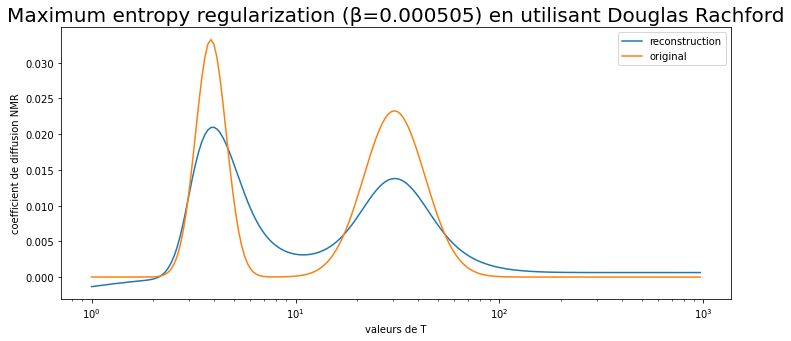

In [319]:
plt.figure(figsize=(12, 5))
plt.title(f"Maximum entropy regularization (β={best_beta}) "
          f"en utilisant Douglas Rachford",fontsize= 20)
plt.semilogx(T,best_x_hat, label="reconstruction")
plt.semilogx(T, sin, label="original")
plt.xlabel("valeurs de T")
plt.ylabel("coefficient de diffusion NMR")
plt.legend(frameon=True);

# Observations:
* Nous remarquons que pour une valeur de $\beta$ bien choisi le signal reconstruit approche bien le signal initial, le centre des pics sont au meme endroit que ceux du signal initial. 

* L'erreur quadratique entre le signal reconstruit et le signal initial est très minime ici. 

Le meilleur choix donc pour $\beta$ pour l'algorithme Forward-Backward est donné par :

In [320]:
best_err = np.inf
best_x_hat = None
best_beta = None
x0 = np.zeros(len(sin))
epsilon = 10**-4
beta_range5 =np.linspace(1e-3, 1e-1, num=3, endpoint=True)
for beta in beta_range5:
    x_hat = FB(beta,x0,epsilon)
    err = quadratic_error(sin,x_hat)
    if err < best_err:
        best_err = err
        best_x_hat = x_hat
        best_beta = beta
print("la meilleur valeur de l'erreur quadratique est ",best_err,"son beta correspondant est ", best_beta)

la meilleur valeur de l'erreur quadratique est  0.6569566536168205 son beta correspondant est  0.0505


In [321]:
print("Donc le meilleur choix de β pour l'algorithme Forward-Backward est", best_beta)

Donc le meilleur choix de β pour l'algorithme Forward-Backward est 0.0505


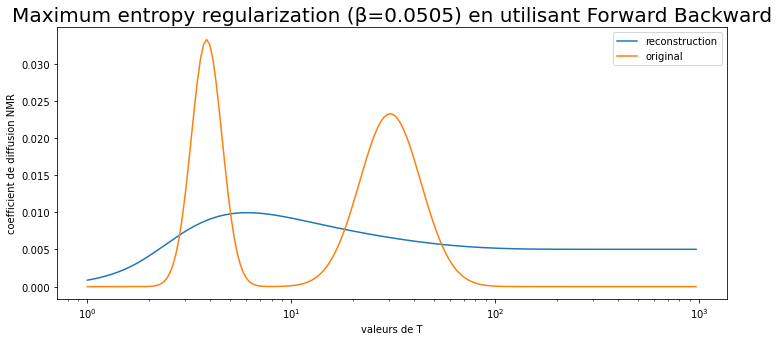

In [322]:
plt.figure(figsize=(12, 5))
plt.title(f"Maximum entropy regularization (β={best_beta}) "
          f"en utilisant Forward Backward",fontsize= 20)
plt.semilogx(T,best_x_hat, label="reconstruction")
plt.semilogx(T, sin, label="original")
plt.xlabel("valeurs de T")
plt.ylabel("coefficient de diffusion NMR")
plt.legend(frameon=True);

# Observations:


* L'erreur quadratique entre le signal reconstruit et le signal initial est assez grande. 

* Dans la visualisation le signal reconstruit est très loin du signal initial et donc l'algorithme Forward-Backward n'est pas adapté au problème Maximum entropy regularization.

**Question 7**

$-$ On veut comparer Maximum entropy regularization avec les regularisations utilisé précédemment :

**Vue d'ensemble **

Voici un tableau qui résume se qu'on a eu comme résultat: 

Algorithm  | meilleure quadratic error | (tolerance)
--- | --- | ---
*Smoothness prior* | 0.39| ``None``
*Smothness prior* + *constraints* | 0.28 | ``tol=1e-4``
*Sparsity prior* | 0.18 | ``tol=1e-4``
*Maximum entropy regularization* (*Forward Backward*) | 0.66 | ``tol=1e-4``
*Maximum entropy regularization* (*Douglas Rachford*) | 0.15 | ``tol=1e-4``


**Remarques **

On remarque que **Maximum entropy regularization** l'emporte en terme de l'erreur quadratique entre le signal reconstruit et le signal initial et cela en utilisant l'algorithme Douglas-Rachford. De plus selon les résultats précédents on voit que **Sparse prior** donne un bon résultat en terme d'erreur quadratique or cette méthode peut rencontrer des difficultés lors du calcul de l'operateur proximal qui n'est pas souvent évident.  

Nous constatons alors que l'utilisation des régularisations précédentes dépend des données et de la nature du problème, cependant le seul inconvéniant demeure dans la recherche manuelle du $\beta$ qui peut s'avérer très couteuse et pas facile tout le temps.

**Question 8**

$-$ On veut résoudre le problème donnée par :
$$\mbox{minimize}\hspace{0.1cm} ent(x)$$
$$s.t\hspace{0.1cm} ||K\,x-y||^2\leq \eta\,M\,\sigma^2$$

Le problème précédent est équivalent à :

$$ \text{minimize} \; \text{ent}(x)  + \iota_{B(y, \sigma \sqrt{M \eta})}(Kx)$$

$$\text{avec}\; B(y, \sigma \sqrt{M \eta})\; \text{la boule  centée  en}\;  y \;\text{de rayon}\;  \sigma \sqrt{M \eta}$$.

On peut alors utiliser l'algorithme PPXA+ qui est la forme parallèle de l'algorithme Douglas Rachford pour résoudre le problème d'optimisation précédent : 

en utilisant les notations du cours , on a  $$g(x) = \sum_{i=1} g_i(x_i) $$ $$\;\text{avec}\; g_1: x_1 \in \mathbb{R}^N \mapsto \text{ent}(x_1)\; \text{et}\; g_2: x_2 \in \text{ran}(K) \mapsto \iota_{B(y, \sigma \sqrt{M \eta})}(x_2)$$ $$\;\text{avec}\; \text{ran}(K) \;\text{est le rang de la matrice } K \in \mathcal{B}(\mathbb{R}^N, \text{ran}(K))$$. 

De plus  $$g_1 \in \Gamma_0(\mathbb{R}^N)$$ Et $$g_2 \in \Gamma_0(\text{ran}(K))$$. 

Aussi  $$L: v \mapsto (L_1 v, L_2 v)$$ Avec  $$L_1 = I_N$$ Et $$L_2 = K$$



Enfin les operateurs proximaux sont donnés par :

$$\text{prox}_{\gamma g_1} (x_1) = \gamma W(\frac{x_1}{\gamma} - 1 - \log (\gamma))$$

$$\text{prox}_{\gamma g_2} (x_2) = y + (x_2 - y) \min(1, \frac{\sigma \sqrt{M \eta}}{\parallel x_2 - y \parallel})$$

In [323]:
def PPXA(nu,epsilon,M,sig):
    gamm = 0.1
    lam = 1.7
    _inv = np.linalg.inv(K.T.dot(K) + np.eye(N))
    x_curr_1 = np.zeros_like(sin)
    x_curr_2 = K.dot(x_curr_1)
    x_next_1 = np.ones_like(sin)
    x_next_2 = K.dot(x_next_1)
    v_curr = _inv.dot(x_curr_1 + K.T.dot(x_curr_2))
    v_next = _inv.dot(x_next_1 + K.T.dot(x_next_2))
    counter = 0
    while np.any(np.abs(v_next - v_curr) / (np.abs(v_curr) + 1e-8) > epsilon): # stopping criterion
        x_curr_1 = x_next_1
        x_curr_2 = x_next_2
        v_curr = v_next
        y_curr_1 = gamm * prox_ent(x_curr_1 / gamm - 1 - np.log(gamm),nu, gamm)
        y_curr_2 = y + (x_curr_2 - y) * np.min([1, sig * np.sqrt(M * nu) / np.linalg.norm(x_curr_2 - y)])
        c_curr = _inv.dot(y_curr_1 + K.T.dot(y_curr_2))
        x_next_1 = x_curr_1 + lam * (2 * c_curr - v_curr - y_curr_1)
        x_next_2 = x_curr_2 + lam * (K.dot(2 * c_curr - v_curr) - y_curr_2)
        v_next = v_curr + lam * (c_curr - v_curr)
        counter += 1
        
    x_hat = v_next
    return x_hat 


In [324]:
best_error = np.inf
best_x_hat = None
best_nu = None
tol = 1e-2
nu_range = np.linspace(0.5, 1.5, num=10, endpoint=True)
M=50
sig = 0.01 * z[0]
for nu in nu_range:    

    x_hat=PPXA(nu,tol,M,sig)
    
    error = quadratic_error(sin,x_hat)

    if error < best_error:
        best_error = error
        best_x_hat = x_hat
        best_nu = nu
print("la meilleur valeur de l'erreur quadratique est ",best_err,"son  η correspondant est ", best_nu)

la meilleur valeur de l'erreur quadratique est  0.6569566536168205 son  η correspondant est  0.8333333333333333


Visualisation:

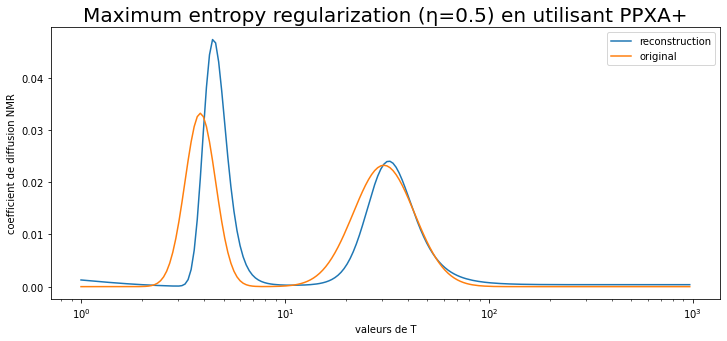

In [325]:
plt.figure(figsize=(12, 5))
plt.title(f"Maximum entropy regularization (η={best_η}) "
          f"en utilisant PPXA+",fontsize= 20)
plt.semilogx(T,best_x_hat, label="reconstruction")
plt.semilogx(T, sin, label="original")
plt.xlabel("valeurs de T")
plt.ylabel("coefficient de diffusion NMR")
plt.legend(frameon=True);

# Observation :

On remarque que le signal reconstruit approche mieux le signal initial et l'erreur quadratique reste très minime. 